In [1]:
# Mutation Simulation experiments (Currently converting from old working directory to new working directory

# Author Fraser Toon

In [2]:
# Imports needed
import os
import subprocess
import helpers
import pandas
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import re
import numpy

In [3]:
# Number of genomes for the test: 540
# Filters are:
# Type: Bacteria
# Length: Complete
# Year: 2023-2024
# Condition (?): Referenced and Annotated

In [4]:
# Specify the starting directory
start_directory = '/home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data'

# Arrays to hold directories and file names
directories = []
file_names = []

# Traverse the directory tree
for root, dirs, files in os.walk(start_directory):
    for file in files:
        if file.endswith('genomic.fna') and "SNP" not in file:
            directories.append(root)
            file_names.append(file)

print(f"Done: {len(directories), len(file_names)}")

# Make full path of original files
index = 0
original_genomes = []
if directories and file_names:
    for first_directory, first_fna_file in zip(directories, file_names):
        file_location = first_directory + "/" + first_fna_file
        original_genomes.append(file_location)
        index = index + 1

else:
    print("No .fna files found.")

print(f"Done: {len(original_genomes)}")

Done: (540, 540)
Done: 540


In [5]:
contents = []
contents_length = []
# Process each file in the file_paths list
for file_path in original_genomes:
    with open(file_path, "r") as file:
        # Read all lines from the file
        lines = file.readlines()
        # Initialize an empty string to hold the content of the current file
        content = ""
        # Process each line, skipping the first line
        for line in lines[1:]:
            # Remove newline characters and concatenate to the content string
            content += line.strip()
            
        # Append the processed content to the contents list
        contents.append(content)
        contents_length.append(len(content))

print(f"Done: {len(contents)}, {len(contents_length)}")

Done: 540, 540


In [7]:
index = 0
rate = [0.05]
for SNP_rate in rate:
    if directories and file_names:
        for first_directory, first_fna_file in zip(directories, file_names):

             # Amount of SNPs for 5%
            SNP_amount = int(contents_length[index]) * 0.05
            SNP_count = int(SNP_amount)

            #SNP_count = int(round(int(contents_length[0]) * rate, 0))

            index = index + 1
            print(f'{index}: {first_directory} -> {first_fna_file}')

            command = f'cd {first_directory} && echo "SNP Rate: 0.05\nChanges: {SNP_count}" > SNP_Changes.txt'

            try:
                # Run the command in the shell with a timeout of 3 minutes
                result = subprocess.run(command, shell=True, timeout=3*60, stderr=subprocess.PIPE, universal_newlines=True)

                # Print stderr output
                if result.stderr:
                    print(result.stderr)
                
            except subprocess.TimeoutExpired as e:
                print(f"Command timed out: {e}")
            except Exception as e:
                print(f"An error occurred: {e}")

            command = f' cd {first_directory} && (/usr/bin/time -v perl /home/ftoon/Tests/simuG/simuG.pl -refseq {first_directory + "/" + first_fna_file} -snp_count {SNP_count} -prefix {SNP_rate}_SNP_Test) > time.txt 2>&1'
            #command = f'cd {first_directory} && perl /Users/frasertoon/Documents/Uni/EGH400-2/Testing/simuG/simuG.pl -refseq {first_directory + "/" + first_fna_file} -snp_count {SNP_count} -prefix {SNP_rate}_SNP_Test'
            try:
                # Run the command in the shell with a timeout of 3 minutes
                result = subprocess.run(command, shell=True, timeout=3*60, stderr=subprocess.PIPE, universal_newlines=True)

                # Print stderr output
                if result.stderr:
                    print(result.stderr)
                
            except subprocess.TimeoutExpired as e:
                print(f"Command timed out: {e}")
            except Exception as e:
                print(f"An error occurred: {e}")
    else:
        print("No .fna files found.")

print("Done")

1: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_032850805.1 -> GCF_032850805.1_ASM3285080v1_genomic.fna
2: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_028885435.1 -> GCF_028885435.1_ASM2888543v1_genomic.fna
3: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_036352135.1 -> GCF_036352135.1_ASM3635213v1_genomic.fna
4: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_028877475.1 -> GCF_028877475.1_ASM2887747v1_genomic.fna
5: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_028609865.1 -> GCF_028609865.1_ASM2860986v1_genomic.fna
6: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_964019765.1 -> GCF_964019765.1_ijPanGerm4.Spiroplasma_sp_1.1_genomic.fna
7: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_029892045.1 -> GCF_029892045.1_ASM2989204v1_genomic.fna
8: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_029714545.1 -> GCF_029714545.1_ASM2971454v1_genomic.fna
9: /home/ftoon/Tests/TestingDat

In [6]:
time_array = []
max_resident_size_array = []

for file_path in directories:
    if not os.path.isfile(file_path + "/time.txt"):
        print(f"The file at {file_path} does not exist.")
        continue

    try:
        with open(file_path + "/time.txt", 'r') as file:
            found_time = False
            found_max_res = False

            for line in file:
                if not found_time:
                    time_match = re.search(r'User time \(seconds\): ([\d.]+)', line)
                    if time_match:
                        time_taken = time_match.group(1)
                        time_array.append(float(time_taken))
                        found_time = True

                if not found_max_res:
                    max_res_match = re.search(r'Maximum resident set size \(kbytes\): (\d+)', line)
                    if max_res_match:
                        max_resident_size = max_res_match.group(1)
                        max_resident_size_array.append(int(max_resident_size))
                        found_max_res = True

                if found_time and found_max_res:
                    break

            if not found_time:
                print(f"No simulation time found in the file: {file_path}")
            if not found_max_res:
                print(f"No maximum resident set size found in the file: {file_path}")
                
    except Exception as e:
        print(f"An error occurred while processing the file {file_path}: {e}")

print(f"Time array: {len(time_array)}")
print(f"Maximum resident size array: {len(max_resident_size_array)}")

print(f"T: {time_array[0]}, M: {max_resident_size_array[0]}")

Time array: 540
Maximum resident size array: 540
T: 1.97, M: 209672


In [7]:
# Array to hold file sizes
file_sizes = []

for file_path in original_genomes:
    try:
        # Get the file size
        file_size = os.path.getsize(file_path)
        # Append the file size to the array
        file_sizes.append(file_size)
    except OSError as e:
        # If there's an error (e.g., file doesn't exist), append None and print an error message
        file_sizes.append(None)
        print(f"Error accessing file {file_path}: {e}")

# Print the array with file sizes
print("File sizes:", len(file_sizes))

File sizes: 540


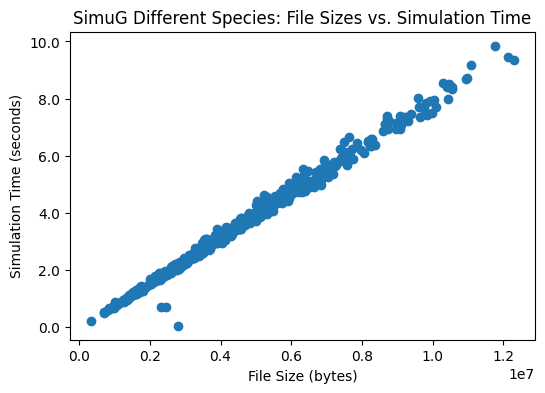

In [8]:
# Plotting time against genome size
# Convert file paths to a simple numeric index for x-axis
x = file_sizes
y = time_array

plt.figure(figsize=(6, 4))  # Set the figure size (width, height)
plt.scatter(x, y)
plt.title('SimuG Different Species: File Sizes vs. Simulation Time')
plt.xlabel('File Size (bytes)')
plt.ylabel('Simulation Time (seconds)')
#plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.show()

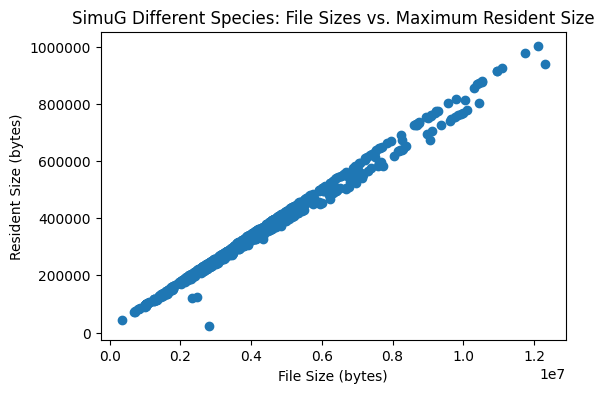

In [9]:
# Plotting time against genome size
# Convert file paths to a simple numeric index for x-axis
x = file_sizes
y = max_resident_size_array
plt.figure(figsize=(6, 4))  # Set the figure size (width, height)
plt.scatter(x, y)
plt.title('SimuG Different Species: File Sizes vs. Maximum Resident Size')
plt.xlabel('File Size (bytes)')
plt.ylabel('Resident Size (bytes)')
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
plt.show()

In [10]:
# Get paths of new genomes
# See if there has been a 5% change in each, get length of orginal, length of change and difference value between them.ls
new_genomes = []
end_pattern = ".fa"
mod_patterns = "0.05"

# Traverse the directory tree
for root, dirs, files in os.walk(start_directory):
    for file in files:
        if end_pattern in file and mod_patterns in file:
            new_genomes.append(str(root) + "/" + str(file))


print(f"Done: {len(new_genomes)}")

if len(new_genomes) != len(directories):
    print(f"Failed: {len(directories) - len(new_genomes)}")


Done: 537
Failed: 3


In [11]:
# List to store values from 'a' that are not in 'b'
new_dir = directories.copy()
locations = []

# Iterate through each element in 'a'
index = 0
for item_a in directories:
    match_found = False
    # Check if any element in 'b' contains the current element in 'a'
    for item_b in new_genomes:
        if item_a in item_b:
            match_found = True
            break
    # If no match found, add to non_matching_values
    if not match_found:
        new_dir.remove(item_a)
        locations.append(index)
    index = index + 1
        
# Print the non-matching values
print(len(new_dir))
print(len(directories))
print(len(locations))

for loc in locations:
    print(loc)

537
540
3
157
181
460


In [12]:
len(new_dir)

537

In [13]:
# Make full path of original files
original_genomes = []
offset = 0
for i in range(len(new_dir)):
    if i + offset in locations:
        for loc in locations:
            loc + 1
        offset = offset + 1
    file_location = new_dir[i] + "/" + file_names[i + offset]
    original_genomes.append(file_location)

print(f"Done: {len(original_genomes)}")
# for j in range(175,185):
#     print(f"{j}, {original_genomes[j]}")


Done: 537


OG: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_032850805.1/GCF_032850805.1_ASM3285080v1_genomic.fna
NG: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_032850805.1/0.05_SNP_Test.simseq.genome.fa
Genome size: 2544243
Percent Difference: 0.05
Differences found: [25, 50, 62, 77, 87, 138, 154, 159, 165, 170, 180, 187, 189]


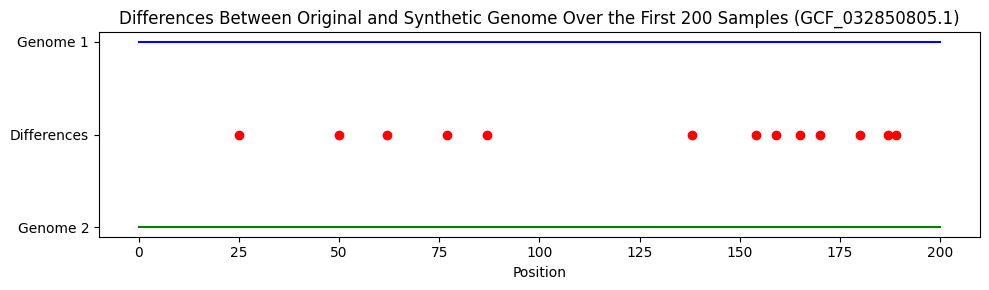

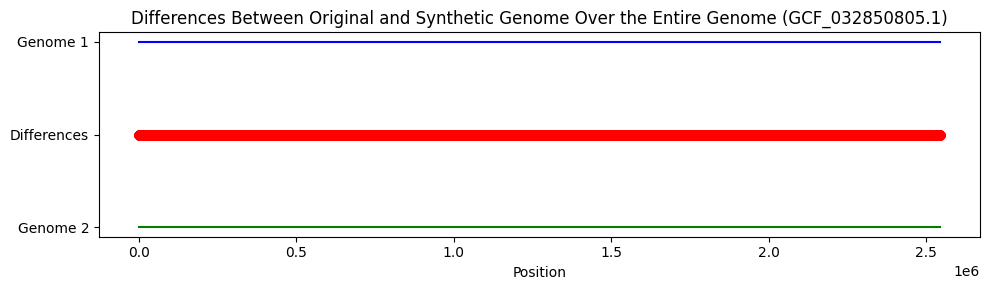

OG: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_028885435.1/GCF_028885435.1_ASM2888543v1_genomic.fna
NG: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_028885435.1/0.05_SNP_Test.simseq.genome.fa
Genome size: 1081520
Percent Difference: 0.05
Differences found: [36, 89, 99, 118, 123, 130, 191]


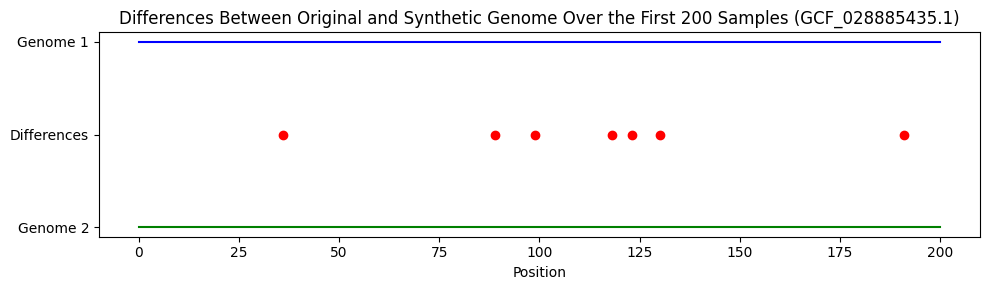

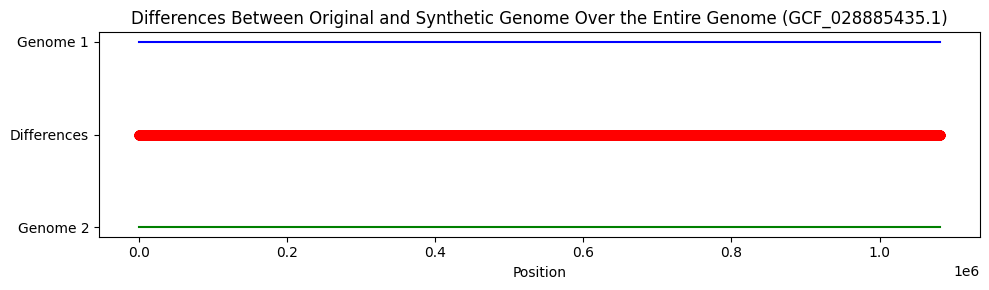

OG: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_036352135.1/GCF_036352135.1_ASM3635213v1_genomic.fna
NG: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_036352135.1/0.05_SNP_Test.simseq.genome.fa
Genome size: 689432
Percent Difference: 0.05
Differences found: [2, 15, 34, 83, 109, 111, 128, 131, 137, 147, 172, 174, 191, 192]


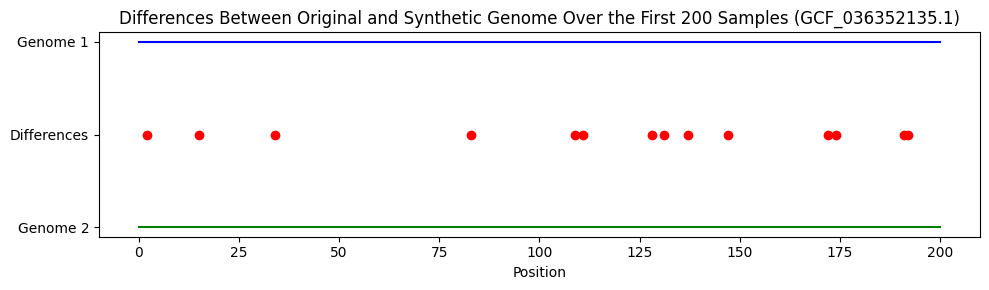

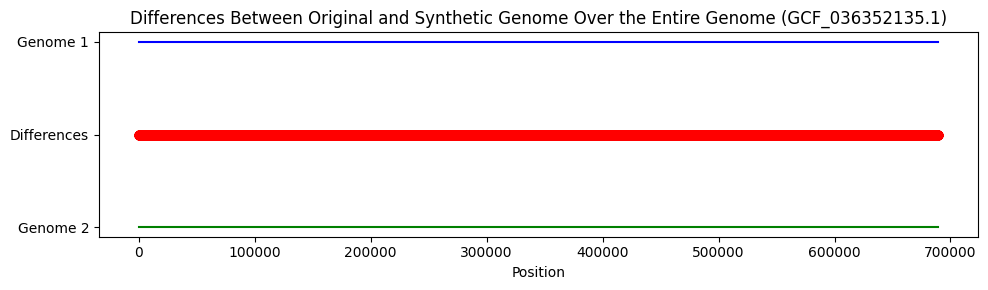

OG: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_028877475.1/GCF_028877475.1_ASM2887747v1_genomic.fna
NG: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_028877475.1/0.05_SNP_Test.simseq.genome.fa
Genomes are not the same size: OG: 4698816, NG: 4698746
Genome size: 4698816
Percent Difference: 0.08619
Differences found: [5, 12, 15, 40, 61, 81, 96, 113, 132, 153, 185, 193]


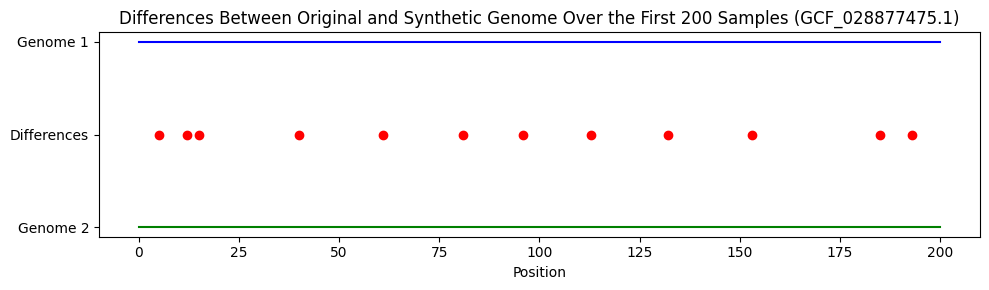

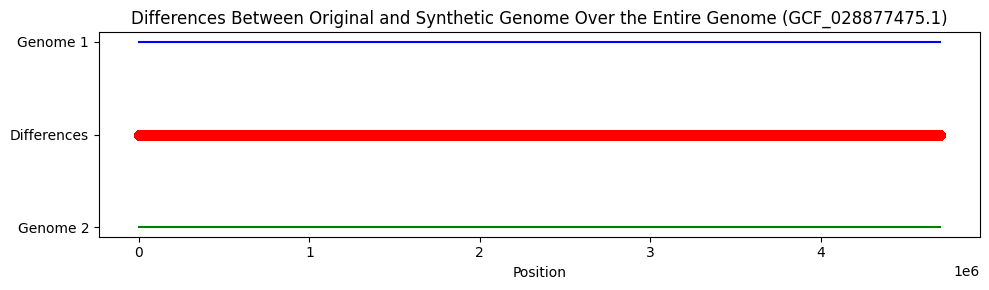

OG: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_028609865.1/GCF_028609865.1_ASM2860986v1_genomic.fna
NG: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_028609865.1/0.05_SNP_Test.simseq.genome.fa
Genome size: 2567696
Percent Difference: 0.05
Differences found: [0, 9, 13, 30, 31, 70, 115]


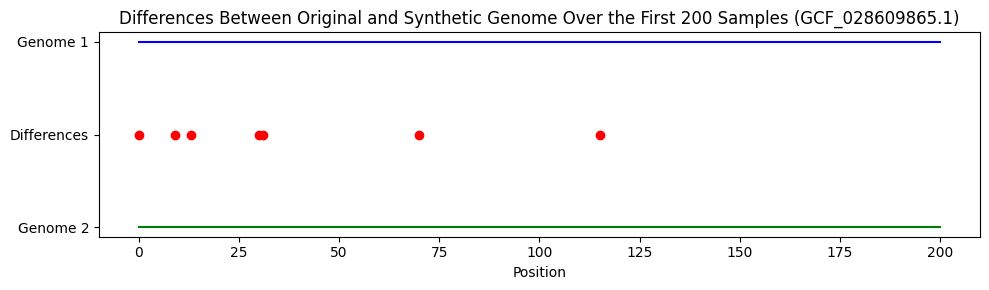

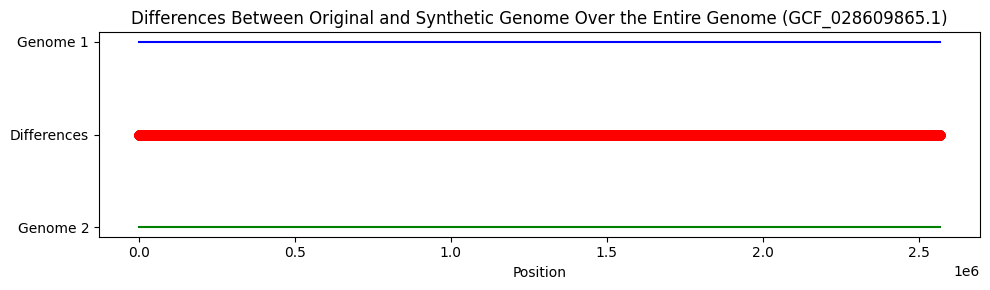

In [15]:
# Locations of SNPs in the genome (Should be uniform at 5%)
for i in range(5):
    file_paths = [original_genomes[i], new_genomes[i]]

    print(f"OG: {original_genomes[i]}\nNG: {new_genomes[i]}")
    # Initialize an empty list to hold the content of each file
    contents = []

    # Process each file in the file_paths list
    for file_path in file_paths:
        with open(file_path, "r") as file:
            # Read all lines from the file
            lines = file.readlines()

            # Initialize an empty string to hold the content of the current file
            content = ""

            # Process each line, skipping the first line
            for line in lines[1:]:
                # Remove newline characters and concatenate to the content string
                content += line.strip()
            
            # Append the processed content to the contents list
            contents.append(content)

    # Check genomes are same size
    if len(contents[0]) != len(contents[1]):
        print(f"Genomes are not the same size: OG: {len(contents[0])}, NG: {len(contents[1])}")

    print(f"Genome size: {len(contents[0])}")

    # Find the differences between the two content strings
    differences = []

    long_diff = []
    for i in range(len(contents[1])):
        if contents[0][i] != contents[1][i]:
            long_diff.append(i)
            
    #for i in range(len(contents[1])):
    for i in range(200):
        if contents[0][i] != contents[1][i]:
            differences.append(i)

    # What is the amount of SNPs conducted
    detail_path = str(directories[index - 1] + "/SNP_Changes.txt")
    with open(detail_path, 'r') as file:
        lines = file.readlines()
        number = lines[1].split(': ')[1]
        number = int(number)

    print(f"Percent Difference: {round(len(long_diff) / len(contents[0]), 5)}")
    print(f"Differences found: {differences}")

    # Plot the differences
    match = re.search(r'(GCF_\d+\.\d+)', file_paths[0])
    name = str(match.group(1))
    fig, ax = plt.subplots(figsize=(10, 3))

    # Scatter plot of differences
    ax.scatter(differences, [1] * len(differences), color='r', label="Differences")

    # Draw lines for the two genomes
    #ax.plot([0, len(contents[0])], [2, 2], label="Genome 1", color='b')
    #ax.plot([0, len(contents[0])], [0, 0], label="Genome 2", color='g')
    ax.plot([0, 200], [2, 2], label="Genome 1", color='b')
    ax.plot([0, 200], [0, 0], label="Genome 2", color='g')

    ax.set_yticks([0, 1, 2])
    ax.set_yticklabels(['Genome 2', 'Differences', 'Genome 1'])
    ax.set_xlabel("Position")
    ax.set_title("Differences Between Original and Synthetic Genome Over the First 200 Samples (" + str(name) + ")")
    #ax.legend()

    # Display the plot
    #ax.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

    
    # Plot the differences
    fig, ax = plt.subplots(figsize=(10, 3))

    # Scatter plot of differences
    ax.scatter(long_diff, [1] * len(long_diff), color='r', label="Differences")

    # Draw lines for the two genomes
    ax.plot([0, len(contents[0])], [2, 2], label="Genome 1", color='b')
    ax.plot([0, len(contents[1])], [0, 0], label="Genome 2", color='g')

    ax.set_yticks([0, 1, 2])
    ax.set_yticklabels(['Genome 2', 'Differences', 'Genome 1'])
    ax.set_xlabel("Position")
    ax.set_title("Differences Between Original and Synthetic Genome Over the Entire Genome (" + str(name) + ")")
    #ax.legend()

    # Display the plot
    #ax.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [107]:
# Running ANI Tests
for i in range(len(new_genomes)):
    file_paths = [original_genomes[i], new_genomes[i]]

    print(f"{i}\nDr: {new_dir[i]}\nOG: {original_genomes[i]}\nNG: {new_genomes[i]}")

    # Process each file in the file_paths list
    command = f'cd {new_dir[i]} && /opt/FastANI-v1.34/fastANI -r {original_genomes[i]} -q {new_genomes[i]} -o {new_dir[i]}/fastani.txt'
    try:
        # Run the command in the shell with a timeout of 3 minutes
        result = subprocess.run(command, shell=True, timeout=3*60, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL, universal_newlines=True)

        # Print stderr output
        if result.stderr:
            print(result.stderr)
                
    except subprocess.TimeoutExpired as e:
        print(f"Command timed out: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")

print("Done")


0
Dr: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_032850805.1
OG: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_032850805.1/GCF_032850805.1_ASM3285080v1_genomic.fna
NG: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_032850805.1/0.05_SNP_Test.simseq.genome.fa
1
Dr: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_028885435.1
OG: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_028885435.1/GCF_028885435.1_ASM2888543v1_genomic.fna
NG: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_028885435.1/0.05_SNP_Test.simseq.genome.fa
2
Dr: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_036352135.1
OG: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_036352135.1/GCF_036352135.1_ASM3635213v1_genomic.fna
NG: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_036352135.1/0.05_SNP_Test.simseq.genome.fa
3
Dr: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_028877475.1
OG: /home/ftoon/

In [16]:
# Read ANI test results
# Arrays to store ANI values and other related information
ani_values_array = []
index = 0

for file_path in new_dir:
    #if check[index] == 1:
    if 1 == 1:
        print(f"{index}: {file_path}")
        fastani_file = os.path.join(file_path, "fastani.txt")
        if not os.path.isfile(fastani_file):
            print(f"The file at {fastani_file} does not exist.")
            continue
    
        try:
            with open(fastani_file, 'r') as file:
                for line in file:
                    parts = line.strip().split('\t')
                    if len(parts) >= 3:
                        try:
                            ani_value = float(parts[2])
                            print(ani_value)
                            ani_values_array.append(ani_value)
                        except ValueError:
                            print(f"Could not convert ANI value to float: {parts[2]}")
                    
        except Exception as e:
            print(f"An error occurred while processing the file {fastani_file}: {e}")
    index += 1

0: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_032850805.1
The file at /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_032850805.1/fastani.txt does not exist.
0: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_028885435.1
The file at /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_028885435.1/fastani.txt does not exist.
0: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_036352135.1
The file at /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_036352135.1/fastani.txt does not exist.
0: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_028877475.1
The file at /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_028877475.1/fastani.txt does not exist.
0: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_028609865.1
The file at /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_028609865.1/fastani.txt does not exist.
0: /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_96

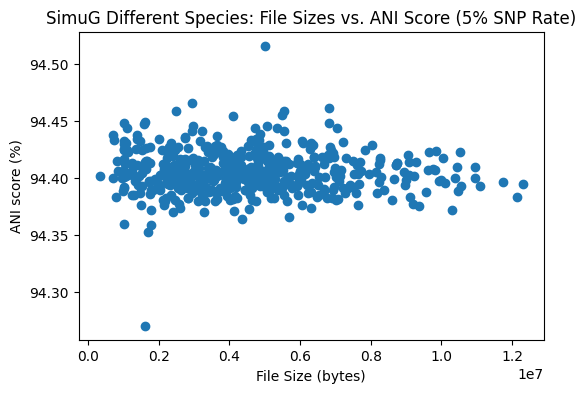

In [17]:
# Plotting time against genome size
# Convert file paths to a simple numeric index for x-axis
x = file_sizes[0:len(ani_values_array)]
y = ani_values_array

plt.figure(figsize=(6, 4))  # Set the figure size (width, height)
plt.scatter(x, y)
plt.title('SimuG Different Species: File Sizes vs. ANI Score (5% SNP Rate)')
plt.xlabel('File Size (bytes)')
plt.ylabel('ANI score (%)')
plt.show()

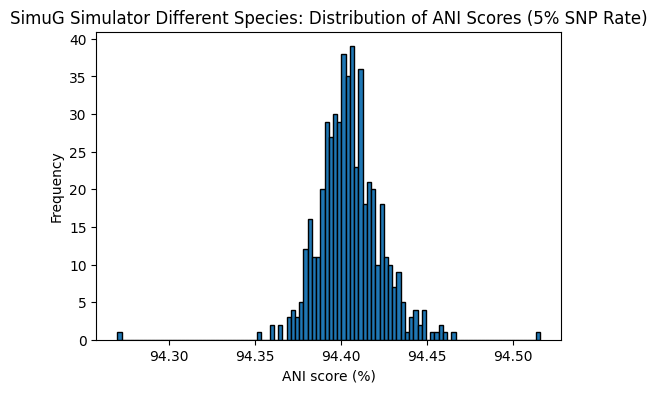

In [18]:
# Your existing data
x = file_sizes
y = ani_values_array

plt.figure(figsize=(6, 4))  # Set the figure size (width, height)

# Create a histogram of the ANI scores
plt.hist(y, bins=100, edgecolor='black')  # Adjust the number of bins as needed
plt.title('SimuG Simulator Different Species: Distribution of ANI Scores (5% SNP Rate)')
plt.xlabel('ANI score (%)')
plt.ylabel('Frequency')
plt.show()


In [19]:
# Calculate statistics for ANI scores
y = numpy.array(ani_values_array)
ani_mean = numpy.mean(y)
ani_median = numpy.median(y)
ani_std = numpy.std(y)
ani_min = numpy.min(y)
ani_max = numpy.max(y)
ani_range = ani_max - ani_min
print("ANI Scores Statistics:")
print(f"Mean: {ani_mean}")
print(f"Median: {ani_median}")
print(f"Standard Deviation: {ani_std}")
print(f"Min: {ani_min}")
print(f"Max: {ani_max}")
print(f"Range: {ani_range}")

ANI Scores Statistics:
Mean: 94.40524781783681
Median: 94.4037
Standard Deviation: 0.018574171278732284
Min: 94.2701
Max: 94.516
Range: 0.245900000000006


In [111]:
# Create simulations at different rates
index = 0
rate = [0.01,0.02,0.03,0.04,0.06,0.07,0.08,0.09,0.10] # Already have done 0.05
for SNP_rate in rate:
    if new_dir and file_names:
        count = 0  # Counter for directories processed
        for first_directory, first_fna_file in zip(new_dir, file_names):
            if count >= 10:  # Check if 10 directories have been processed
                break

            index = index + 1
            print(f'{index}: {SNP_rate}) {first_directory} -> {first_fna_file}')

            # Build the command to change directory and show the first 10 lines of the .fna file
            command = f'cd {first_directory} && (/usr/bin/time -v mutation-simulator {first_fna_file} args -sn {SNP_rate} && mv $(find . -name "*.fna" | grep -vi "_gen" | grep -vi "SNP") SNP_{SNP_rate}_{first_fna_file} && mv $(find . -name "*.fna.fai" | grep -vi "SNP") SNP_{SNP_rate}_{first_fna_file}.fai) > stats.txt 2>&1'

            try:
                # Run the command in the shell with a timeout of 3 minutes
                result = subprocess.run(command, shell=True, timeout=3*60, stderr=subprocess.PIPE, universal_newlines=True)

                # Print stderr output
                if result.stderr:
                    print(result.stderr)
                
            except subprocess.TimeoutExpired as e:
                print(f"Command timed out: {e}")
            except Exception as e:
                print(f"An error occurred: {e}")

            count += 1  # Increment the counter after processing a directory
    else:
        print("No .fna files found.")
print("Done")


1: 0.01) /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_032850805.1 -> GCF_032850805.1_ASM3285080v1_genomic.fna
2: 0.01) /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_028885435.1 -> GCF_028885435.1_ASM2888543v1_genomic.fna
3: 0.01) /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_036352135.1 -> GCF_036352135.1_ASM3635213v1_genomic.fna
4: 0.01) /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_028877475.1 -> GCF_028877475.1_ASM2887747v1_genomic.fna
5: 0.01) /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_028609865.1 -> GCF_028609865.1_ASM2860986v1_genomic.fna
6: 0.01) /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_964019765.1 -> GCF_964019765.1_ijPanGerm4.Spiroplasma_sp_1.1_genomic.fna
7: 0.01) /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_029892045.1 -> GCF_029892045.1_ASM2989204v1_genomic.fna
8: 0.01) /home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_029714545.1 -> GCF_029714545.1_ASM29714

In [20]:
# Get paths of new genomes
# See if there has been a 5% change in each, get length of orginal, length of change and difference value between them.ls
ani_genomes = []
end_pattern = ".fna"
mod_patterns = ["SNP_0.01", "SNP_0.02", "SNP_0.03", "SNP_0.04", "SNP_0.05", "SNP_0.06", "SNP_0.07", "SNP_0.08", "SNP_0.09", "SNP_0.1"]
bad_pattern = ".fai"

directory_count = 0
for root, dirs, files in os.walk(start_directory):
    if directory_count > 10:  # Stop after checking 10 directories
        break
    
    for file in files:
        if end_pattern in file and any(mod_pattern in file for mod_pattern in mod_patterns) and bad_pattern not in file:
            ani_genomes.append(os.path.join(root, file))

    directory_count += 1

print(len(ani_genomes))
print(ani_genomes[0])

90
/home/ftoon/Tests/TestingDatasets/ncbi_datasetSimG/data/GCF_032850805.1/SNP_0.1_GCF_032850805.1_ASM3285080v1_genomic.fna


In [13]:
# Get the first ten directories
dir_ten = new_dir[0:10]

# Extract the SNP_0.01 pattern 
for file_path in ani_genomes:

    # Figure out which number it is
    snp_pattern = re.search(r'SNP_\d+\.\d+', file_path)
    if snp_pattern:
        snp_full = snp_pattern.group(0)
    
        # Extract the numeric value from the SNP_0.01 pattern
        snp_value = re.search(r'\d+\.\d+', snp_full)
        if snp_value:
            snp_numeric = snp_value.group(0)

    # Get the OG dir
    og_dir = re.split(r'SNP_', file_path)[0]

    # Get the OG file
    matching_path = None
    for path in original_genomes:
        if path.startswith(og_dir):
            matching_path = path
            break

    command = f'cd {og_dir} && /opt/FastANI-v1.34/fastANI -r {matching_path} -q {file_path} -o {og_dir}/{snp_numeric}_fastani.txt'
    try:
        # Run the command in the shell with a timeout of 3 minutes
        result = subprocess.run(command, shell=True, timeout=3*60, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL, universal_newlines=True)

        # Print stderr output
        if result.stderr:
            print(result.stderr)
                
    except subprocess.TimeoutExpired as e:
        print(f"Command timed out: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")

    

In [47]:
dir_ten = new_dir[0:10]
for folder in dir_ten:
    for dirpath, dirnames, filenames in os.walk(folder):
        for file in filenames:
            if '0.05_fastani.txt' == file:
                file_path = os.path.join(dirpath, file)
                new_file_path = os.path.join(dirpath, 'fastani.txt')
                command = f'mv {file_path} {new_file_path}'
                try:
                    # Run the command in the shell with a timeout of 3 minutes
                    result = subprocess.run(command, shell=True, timeout=3*60, stdout=subprocess.DEVNULL, stderr=subprocess.PIPE, universal_newlines=True)

                    # Print stderr output if any
                    if result.stderr:
                        print(result.stderr)
                
                except subprocess.TimeoutExpired as e:
                    print(f"Command timed out: {e}")
                except Exception as e:
                    print(f"An error occurred: {e}")

In [21]:
dir_ten = new_dir[0:10]  # Get the first 10 directories from new_dir
for folder in dir_ten:
    for dirpath, dirnames, filenames in os.walk(folder):
        for file in filenames:
            if 'fastani.txt' == file:  # Look for 'fastani.txt'
                file_path = os.path.join(dirpath, file)
                new_file_path = os.path.join(dirpath, '0.05_fastani.txt')  # New name
                command = f'mv {file_path} {new_file_path}'  # Command to rename the file
                try:
                    # Run the command in the shell with a timeout of 3 minutes
                    result = subprocess.run(command, shell=True, timeout=3*60, stdout=subprocess.DEVNULL, stderr=subprocess.PIPE, universal_newlines=True)

                    # Print stderr output if any
                    if result.stderr:
                        print(result.stderr)
                
                except subprocess.TimeoutExpired as e:
                    print(f"Command timed out: {e}")
                except Exception as e:
                    print(f"An error occurred: {e}")

In [22]:
# List to store ANI values
ani_test_results = []
dir_ten = new_dir[0:10]

for folder in dir_ten:
    try:
        for root, _, files in os.walk(folder):
            for file in files:
                if '_fastani' in file:
                    if file[0:4] == "0.1_":
                        file_id = float(file[0:3])
                    else:
                        file_id = float(file[0:4])
                    file_path = os.path.join(root, file)

                    # Open and read the file
                    with open(file_path, 'r') as f:
                        for line in f:
                            parts = line.strip().split('\t')
                            if len(parts) >= 3:
                                try:
                                    ani_value = float(parts[2])
                                    ani_test_results.append([folder[56:], file_id, ani_value])
                                except ValueError:
                                    print(f"Could not convert ANI value to float: {parts[2]}")
    except Exception as e:
        print(f"An error occurred while processing files in folder {folder}: {e}")


print(len(ani_test_results))

100


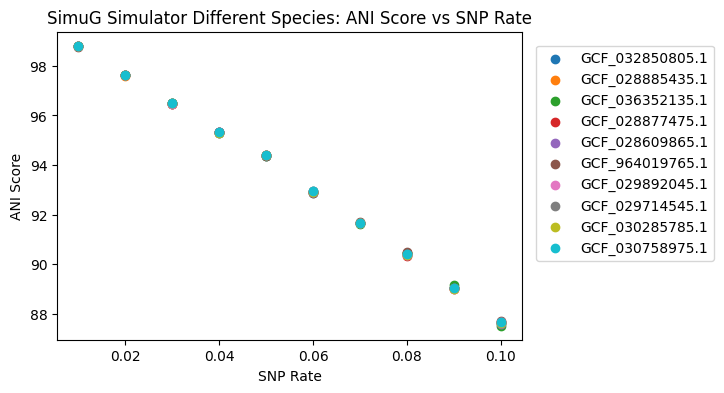

In [24]:
# Create a dictionary to store data by legend
data_dict = {}
for entry in ani_test_results:
    legend, x, y = entry
    if legend not in data_dict:
        data_dict[legend] = {'x': [], 'y': []}
    data_dict[legend]['x'].append(x)
    data_dict[legend]['y'].append(y)

# Plotting
plt.figure(figsize=(6, 4))

for legend, values in data_dict.items():
    # Scatter plot
    plt.scatter(values['x'], values['y'], label=legend)
    # Line plot to connect the dots
    #plt.plot(values['x'], values['y'], linestyle='-', marker='o')

plt.xlabel('SNP Rate')
plt.ylabel('ANI Score')
plt.title('SimuG Simulator Different Species: ANI Score vs SNP Rate')
# Adjust the legend to be outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=1)
plt.show()